# Đồ án cuối kì môn lập trình khoa học dữ liệu

# A. Thu thập dữ liệu
I. Giới thiệu chủ đề và thông tin tập dữ liệu
1. Chủ đề
Tên chủ đề: 

2. Lý do lựa chọn chủ đề và tập dữ liệu


3. Thông tin tập dữ liệu

II. Tổng quan về cấu trúc tập dữ liệu
1. Thời điểm thu thập dữ liệu
Tập dữ liệu được nhóm thống nhất tải ở dạng file csv vào ngày 24/12/2022

Dữ liệu gồm  dòng và  cột

2. Cấu trúc tập dữ liệu
Tập dữ liệu được tải xuống chỉ chứa duy nhất 1 bảng, gồm 15 thuộc tính.

# B. Khám phá dữ liệu


# 1. Đọc dữ liệu và tính số dòng, số cột
Import các thư viện cần thiết


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Đọc file DataScientist.csv và in ra 5 dòng đầu tiên



In [2]:
df_1 = pd.read_csv('archive/data.csv',delimiter =';')
df_2 = pd.read_csv('archive/update.csv',delimiter =';')
df = pd.concat([df_1,df_2])
df.head(5)

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN


tính số dòng và cột của data

In [3]:
num_rows,num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 960902
Number of columns: 15


Vậy dataframe gồm 934617 dòng và 15 cột

# 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng trong tập dữ liệu là thông tin về điểm thi THPT 2021 của thí sinh . Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức là không có dòng nào bị 'lạc loài'



# 3. Dữ liệu có dòng nào bị lặp không?
Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng duplicated() và any() trên dataframe df và lưu kết quả vào biến have_duplicated_rows. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp.



In [4]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp



# 4. Tỉ lệ giá trị thiếu của mỗi cột
Ta cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức isnull() trên dataframe df và tính tổng số giá trị thiếu của từng cột bằng phương thức sum(). Cuối cùng ta chia số dòng và lưu kết quả vào missing_ratio.



In [5]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

id_examinee        0.000000
math               0.010607
physics            0.653136
chemistry          0.651471
biology            0.657041
history            0.354898
geography          0.360770
literature         0.013516
civic_education    0.460029
english            0.126913
russian            0.999893
french             0.999173
chinese            0.997755
german             0.999887
japanese           0.998952
dtype: float64

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức describe() trên dataframe df.



In [6]:
df.describe()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
count,9.609020e+05,950710.000000,333302.000000,334902.000000,329550.000000,619880.000000,614237.000000,947914.000000,518859.000000,838951.000000,103.000000,795.000000,2157.000000,109.000000,1007.000000
mean,2.632163e+07,6.618351,6.582776,6.634617,5.511298,4.975644,6.955494,6.483819,8.377862,5.846541,8.601942,7.894591,7.834214,7.266055,6.622046
std,1.906657e+07,1.683284,1.393538,1.598686,1.443058,1.770025,1.178250,1.363939,1.155020,2.213796,1.449677,1.938606,2.077568,1.728424,2.288764
min,1.000002e+06,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000,2.000000,0.000000,2.200000,1.200000
25%,8.003250e+06,5.400000,5.750000,5.500000,4.500000,3.500000,6.250000,5.750000,7.750000,4.000000,8.200000,6.600000,6.800000,6.400000,4.600000
50%,2.601839e+07,7.000000,6.750000,7.000000,5.500000,4.750000,7.000000,6.500000,8.500000,5.600000,9.200000,8.400000,8.600000,7.600000,7.000000
75%,4.200339e+07,8.000000,7.750000,8.000000,6.500000,6.250000,7.750000,7.500000,9.250000,7.800000,9.600000,9.600000,9.400000,8.600000,8.800000
max,6.400684e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# 5. Kiểu dữ liệu của mỗi cột? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?


In [7]:
col_dtype = df.dtypes
col_dtype

id_examinee          int64
math               float64
physics            float64
chemistry          float64
biology            float64
history            float64
geography          float64
literature         float64
civic_education    float64
english            float64
russian            float64
french             float64
chinese            float64
german             float64
japanese           float64
dtype: object

# Nhận xét
Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp.

# 6. Mỗi cột có ý nghĩa gì?
Ý nghĩa mỗi thuộc tính trong dataframe:
- id_examinee: id thí sinh dự thi
- math: điểm toán
- physics: điểm lí
- chemistry: điểm hóa
- biology: điểm sinh
- history: điểm sử
- geography: điểm địa lí
- literature: điểm ngữ văn
- civic_education: điểm gdcd
- english: điểm tiếng Anh
- russian: điểm tiếng Nga
- french: điểm tiếng Pháp
- german: điểm tiếng Đức
- japanese: điểm tiếng Nhật

# 7. Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?
Với các cột có kiểu dữ liệu số, ta sẽ tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Ta sẽ lưu kết quả vào DataFrame num_col_info_df, trong đó:

- Tên của các cột là tên của các cột số trong df
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

In [8]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [9]:
num_col_info_df

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
row_name,,,,,,,,,,,,,,,
missing_ratio,0.00,1.1,65.30,65.1,65.7,35.50,36.10,1.40,46.00,12.7,100.0,99.9,99.8,100.0,99.9
min,1000002.00,0.6,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,3.6,2.0,0.0,2.2,1.2
lower_quartile,8003250.25,5.4,5.75,5.5,4.5,3.50,6.25,5.75,7.75,4.0,8.2,6.6,6.8,6.4,4.6
median,26018394.50,7.0,6.75,7.0,5.5,4.75,7.00,6.50,8.50,5.6,9.2,8.4,8.6,7.6,7.0
upper_quartile,42003386.75,8.0,7.75,8.0,6.5,6.25,7.75,7.50,9.25,7.8,9.6,9.6,9.4,8.6,8.8
max,64006838.00,10.0,10.00,10.0,10.0,10.00,10.00,10.00,10.00,10.0,10.0,10.0,10.0,10.0,10.0


***Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**

Không có giá trị không hợp lệ trong mỗi cột và toàn bộ dữ liệu đều có kiểu dữ liệu dạng int64 hoặc float64

# Câu hỏi: so sánh phổ điểm của các khối thi
Bao gồm các khối:
- Khối A: Toán, Vật lý, Hóa học
- Khối A1: Toán, Vật lý, Tiếng Anh
- Khối B: Toán, Hóa học, Sinh học
- Khối C: Ngữ văn, Lịch sử, Địa lý
- Khối D1: Ngữ văn, Toán, Tiếng Anh
- Khối D2: Ngữ văn, Toán, Tiếng Nga
- Khối D3: Ngữ văn, Toán, Tiếng Pháp
- Khối D4: Ngữ văn, Toán, Tiếng Trung Quốc
- Khối D5: Ngữ văn, Toán, Tiếng Đức 
- Khối D6: Ngữ văn, Toán, Tiếng Nhật

đầu tiên ta tính điểm thi theo từng khối của từng thí sinh.

In [10]:
df['A']= df['math']+df['physics']+df['chemistry']
df['A1']= df['math']+df['physics']+df['english']
df['B']= df['math']+df['biology']+df['chemistry']
df['C']= df['literature']+df['history']+df['geography']
df['D1']= df['literature']+df['math']+df['english']
df['D2']= df['literature']+df['math']+df['russian']
df['D3']= df['literature']+df['math']+df['french']
df['D4']= df['literature']+df['math']+df['chinese']
df['D5']= df['literature']+df['math']+df['german']
df['D6']= df['literature']+df['math']+df['japanese']

df_group = df[['A','A1','B','C','D1','D2','D3','D4','D5','D6']].copy()
df_group.head(5)

,A,A1,B,C,D1,D2,D3,D4,D5,D6
0,NaN,NaN,NaN,23.75,27.45,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,14.50,NaN,NaN,NaN,NaN,NaN,NaN
2,15.4,22.40,14.9,NaN,25.15,NaN,NaN,NaN,NaN,NaN
3,22.8,26.45,19.8,NaN,26.45,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,20.25,25.35,NaN,NaN,NaN,NaN,NaN


In [11]:
df_group.describe()

,A,A1,B,C,D1,D2,D3,D4,D5,D6
count,331686.000000,320114.000000,329502.000000,613849.000000,835701.000000,103.000000,791.000000,2152.000000,107.000000,1006.000000
mean,21.041619,21.105937,19.993407,18.337480,19.274288,24.210194,22.916384,22.120395,22.677103,21.376352
std,3.188018,3.442263,3.086493,3.617743,4.108795,2.376389,3.276528,4.082515,3.045359,3.600366
min,4.050000,4.850000,4.400000,0.750000,4.250000,17.350000,9.650000,6.600000,13.200000,11.400000
25%,19.150000,18.800000,18.000000,16.000000,16.350000,22.975000,20.900000,20.100000,21.200000,18.550000
50%,21.450000,21.400000,20.200000,18.250000,19.400000,24.750000,23.550000,23.200000,23.100000,21.925000
75%,23.400000,23.750000,22.100000,20.750000,22.550000,25.775000,25.550000,25.100000,24.850000,24.450000
max,29.550000,29.550000,30.000000,29.250000,29.150000,27.700000,28.300000,28.300000,27.850000,27.850000


In [12]:
a = np.arange(0,31,1,dtype = int)
temp = pd.DataFrame()
temp['A'] = df_group['A'].value_counts(bins = a, sort = False)
temp['A1'] = df_group['A1'].value_counts(bins = a, sort = False)
temp['B'] = df_group['B'].value_counts(bins = a, sort = False)
temp['C'] = df_group['C'].value_counts(bins = a, sort = False)
temp['D1'] = df_group['D1'].value_counts(bins = a, sort = False)
temp['D2'] = df_group['D2'].value_counts(bins = a, sort = False)
temp['D3'] = df_group['D3'].value_counts(bins = a, sort = False)
temp['D4'] = df_group['D4'].value_counts(bins = a, sort = False)
temp['D5'] = df_group['D5'].value_counts(bins = a, sort = False)
temp['D6'] = df_group['D6'].value_counts(bins = a, sort = False)

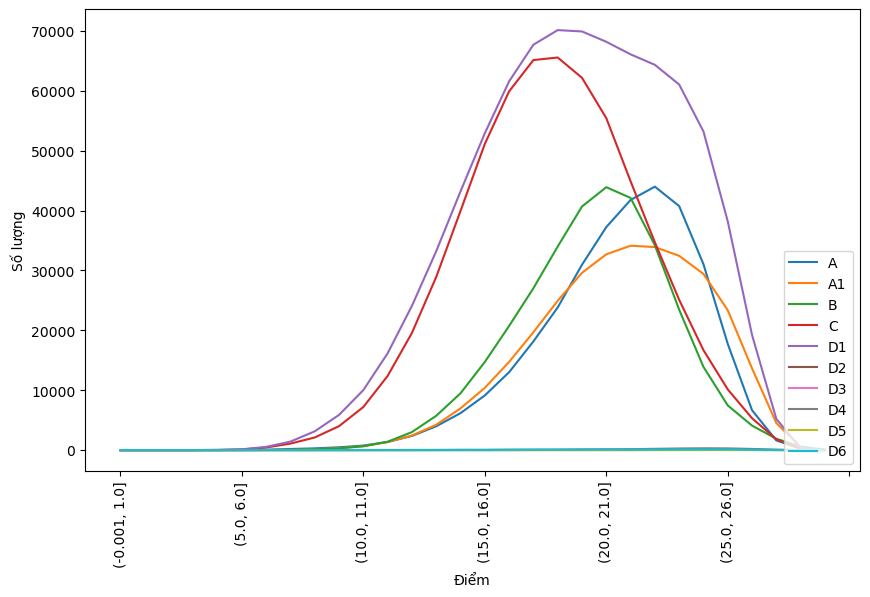

In [19]:
temp.plot(figsize=(10, 6))
plt.xlabel("Điểm")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Số lượng")
plt.legend(loc='lower right')
plt.show()

Qua biểu đồ có thể thấy Khối C, D được thi nhiều nhất và các khối A, A1, B có phổ điểm trung bình cao nhất 

Giải thích:
    
- Do xu hướng hiện nay các trường đại học chuyển qua xét tuyển học bạ và thi đánh giá năng lực để có thể tuyển sinh sớm nên các khối xã hội được chọn để hoàn thành tốt nghiệp khá nhiều
- Trong khi đó các khối A,A1,B là các khối tự nhiên có tỉ lệ cạnh tranh cao khi xét điểm vào đại học nên có phổ điểm trung bình cao
